## __COMPUTATION II: ALGORITHMS & DATA STRUCTURES__

## Practical Classes

## Week 11: Sorting Algorithms & Exercises

## Shell Sort
[See explanation here](https://www.programiz.com/dsa/shell-sort)

In [4]:
def shell_sort(array):
    interval = len(array) // 2
    while interval > 0:
        for i in range(interval, len(array)):
            while i >= interval and array[i] < array[i-interval]:
                array[i], array[i-interval] = array[i-interval], array[i]
                i -= interval
        interval //= 2
    return array

shell_sort([34,12,20,7,13,15,2,23])

[2, 7, 12, 13, 15, 20, 23, 34]

## Merge sort

In [8]:
def merge(left, right):
    # I know the two lists will be sorted amongst themselves
    output = []
    i = j = 0
    # Set up a loop where you check for the indices on both lists
    # loop should stop when we run out of options on one of them
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            output.append(left[i])
            i += 1
        else:
            output.append(right[j])
            j += 1
    # Append whatever values are left to the output
    # output.extend(left[i:])
    # output.extend(right[j:])
    return [*output, *left[i:], *right[j:]]

def merge_sort(seq):
    if len(seq) == 1:
        return seq
    
    idx_half = len(seq) // 2
    right = merge_sort(seq[idx_half:])
    left = merge_sort(seq[:idx_half])
    return merge(left, right)

In [9]:
merge_sort([34,12,20,7,13,15,2,23])

[2, 7, 12, 13, 15, 20, 23, 34]

In [6]:
merge([1, 3, 5, 7], [2, 4, 10, 50])

[1, 2, 3, 4, 5, 7, 10, 50]

## Running Time Visualization

Running time is how long it takes a program to run

Time complexity is a description of the asymptotic behavior of running time as input size tends to infinity.

They are two different things!!!

In [50]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import random

In [17]:
def insertion_sort(array):
    for i in range(1,len(array)):
        for j in range(i,0,-1):
            if array[j] < array[j-1]:
                array[j], array[j-1] = array[j-1], array[j]
    return array

def bubble_sort(array):
    for i in range(0,len(array)):
        for j in range(0,len(array)-i-1):
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
    return array

def selection_sort(array):
    for i in range(0,len(array)):
        index_of_min = i
        for j in range(i+1,len(array)):
            if array[j] < array[index_of_min]:
                index_of_min = j
        array[i], array[index_of_min] = array[index_of_min], array[i]
    return array

# ------------------------------------------------------------------------------------------
# Where is ``merge_sort``? If we didn't implement it last class, we might have to do it now! 
# ------------------------------------------------------------------------------------------

We will use this notation: 

timeit.timeit(lambda: algorithm(input), number=1)

In [18]:
eval("insertion_sort")

<function __main__.insertion_sort(array)>

In [32]:
import numpy as np
import timeit
from copy import deepcopy

input_size = list(range(10, 1001))
times = {
    "insertion_sort": [],
    "bubble_sort": [],
    "selection_sort": [],
    "shell_sort": [],
    "merge_sort": [],
}

for n in input_size:
    seq = np.random.randint(0, 50, size=n)
    for sorting_algo in times.keys():
        seq_ = deepcopy(seq)
        times[sorting_algo].append(
            timeit.timeit(lambda: eval(sorting_algo)(seq_), number=1)
        )
    

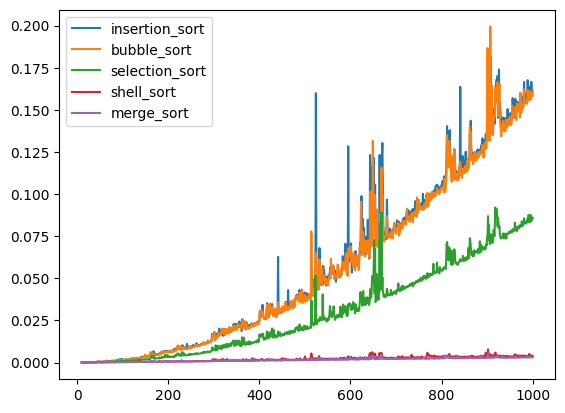

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for sorting_algo in times.keys():
    ax.plot(input_size, times[sorting_algo], label=sorting_algo)
plt.legend()
plt.show()